In [ ]:
!nvidia-smi

Sun Feb 11 14:57:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [ ]:
%cd /content/yolov8

/content/yolov8


## Training the model on custom data

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data= data.yaml epochs=50 imgsz=416 plots=True

100% 83.7M/83.7M [00:00<00:00, 289MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

In [ ]:
!ls runs/detect/train

args.yaml					     results.png	    val_batch0_pred.jpg
confusion_matrix.png				     train_batch0.jpg	    val_batch1_labels.jpg
events.out.tfevents.1707664865.fbc9f4153d28.12788.0  train_batch1.jpg	    val_batch1_pred.jpg
F1_curve.png					     train_batch2.jpg	    val_batch2_labels.jpg
P_curve.png					     train_batch4640.jpg    val_batch2_pred.jpg
PR_curve.png					     train_batch4641.jpg    weights
R_curve.png					     train_batch4642.jpg
results.csv					     val_batch0_labels.jpg


## Visualizing the results

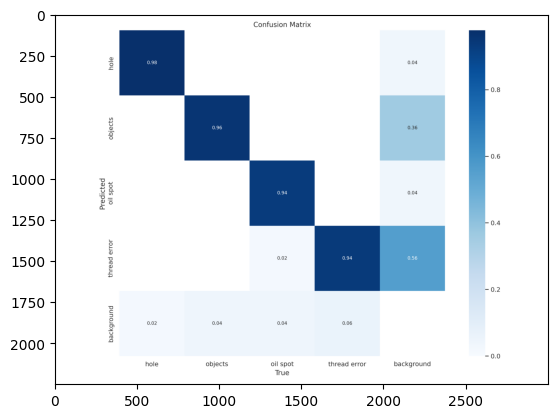

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/yolov8/runs/detect/train/confusion_matrix.png')
plt.imshow(img)
# plt.axis('off')
plt.show()

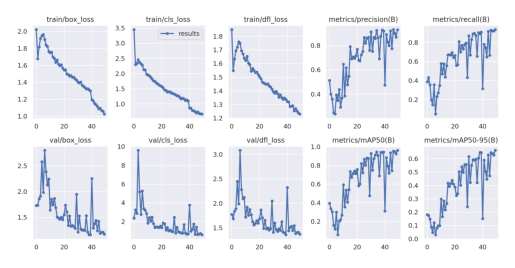

In [ ]:
img1 = mpimg.imread('/content/yolov8/runs/detect/train/results.png')
plt.imshow(img1)
plt.axis('off')
plt.show()

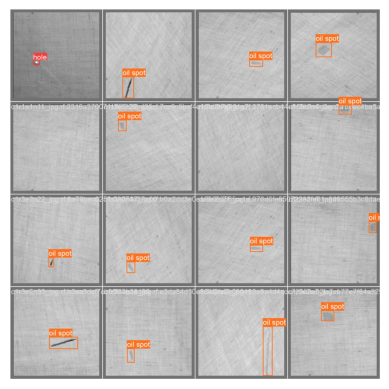

In [ ]:
img2 = mpimg.imread('/content/yolov8/runs/detect/train/val_batch0_labels.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

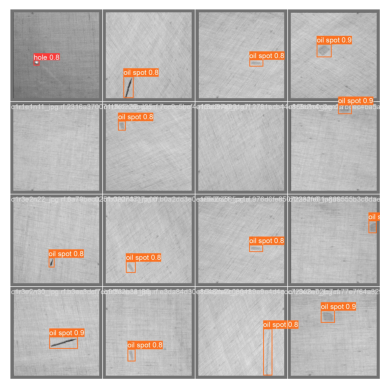

In [ ]:
img2 = mpimg.imread('/content/yolov8/runs/detect/train/val_batch0_pred.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

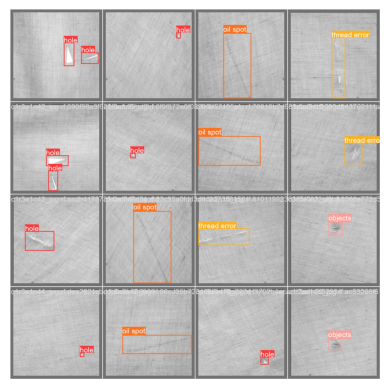

In [ ]:
img2 = mpimg.imread('/content/yolov8/runs/detect/train/val_batch1_labels.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

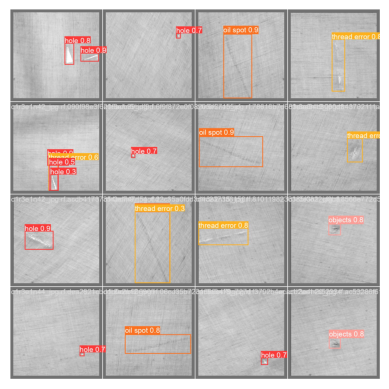

In [ ]:
img2 = mpimg.imread('/content/yolov8/runs/detect/train/val_batch1_pred.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

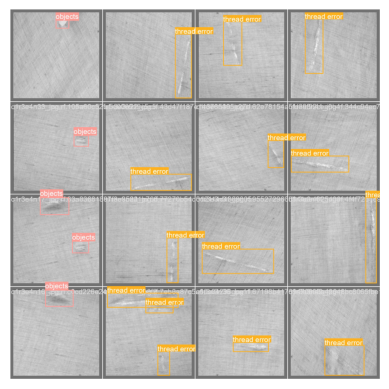

In [ ]:
img2 = mpimg.imread('/content/yolov8/runs/detect/train/val_batch2_labels.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

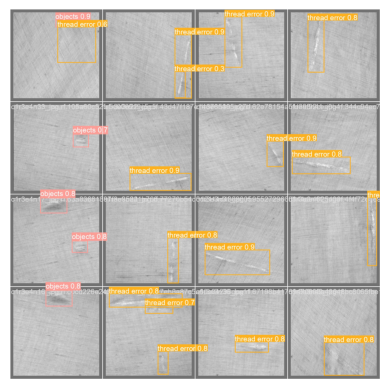

In [ ]:
img2 = mpimg.imread('/content/yolov8/runs/detect/train/val_batch2_pred.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

## Validate Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

2024-02-11 16:13:23.704504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 16:13:23.704561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 16:13:23.706376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-11 16:13:25.229774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/90 /content/yolov8/dat

## Inference with Custom Model

In [ ]:
!yolo val model=runs/detect/train/weights/best.pt data=data.yaml

2024-02-11 16:13:56.168899: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 16:13:56.168949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 16:13:56.170123: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-11 16:13:57.339846: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43609692 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/yolov8/data/valid/labels.cache... 177 images, 2 b